<a href="https://colab.research.google.com/github/crojasce/ProyectoBE/blob/main/Copia_de_ML_BioSta_PROYECTO_Diabetes_CR_JM_JR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Métodos de Machine Learning en Bioestadística**
##**Proyecto: Diabetes Mellitus**

Integrantes:
- Carolina Rojas
- Jorge Marulanda
- Jheremy Reyes

**Importancia global de la diabetes mellitus**

La diabetes mellitus representa una de las crisis sanitarias más urgentes a nivel mundial. Según la última edición del IDF Diabetes Atlas (2025), aproximadamente 589 millones de adultos entre 20 y 79 años viven con diabetes, cifra que podría aumentar hasta 853 millones para 2050 si no se adoptan medidas efectivas.

- En 2024, la diabetes fue responsable de 3,4 millones de muertes y generó un gasto sanitario global estimado en 1 billón de dólares estadounidenses
Diabetes Atlas
- La carga recae de manera desproporcionada sobre los países de ingresos bajos y medios, que concentran aproximadamente el 81 % de los adultos con diabetes, con una proporción significativa de casos no diagnosticados

- Esta enfermedad crónica conlleva complicaciones graves como daño vascular, renal, ocular y aumento de mortalidad precoz, lo que resalta la necesidad imperiosa de mejorar la detección temprana, el acceso al tratamiento y las políticas de salud pública.

**Importancia de la diabetes mellitus en Colombia**

En Colombia, la situación también es preocupante. Datos del IDF Diabetes Atlas indican que el 8,4 % de la población adulta padece diabetes, lo que equivale a unos 3 033 800 casos en un total de 36 728 500 adultos
International Diabetes Federation
. En Bogotá, un estudio transversal realizado entre 2022 y 2023 muestra que el 11 % de los adultos tienen diabetes tipo 2, cifra superior a la estimada previamente, con elevadas tasas asociadas a factores como edad avanzada, obesidad abdominal, dislipidemia y bajo nivel educativo
PubMed
. Estos datos enfatizan la urgencia de intervenciones conjuntas entre políticas públicas, atención primaria y educación comunitaria para prevenir un aumento mayor de la prevalencia y sus complicaciones en el país.

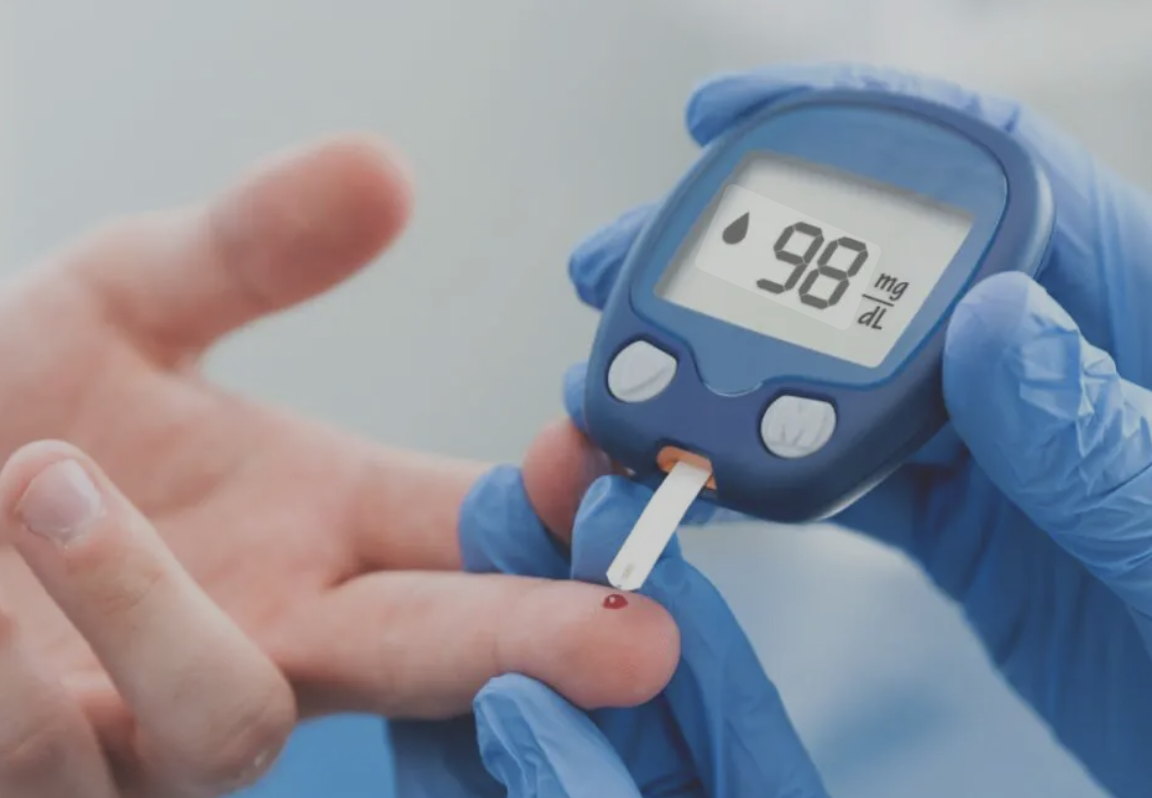

**Contexto y motivación:**

La diabetes mellitus es una de las principales causas de morbilidad y mortalidad en el mundo. La medición de la hemoglobina glicosilada (HbA1c) es un indicador clave del control glucémico y se ha asociado con mejores resultados clínicos y menor riesgo de complicaciones. En el contexto hospitalario, la identificación y manejo oportuno del control glucémico representan una oportunidad para reducir reingresos y optimizar la atención. Nuestro proyecto se centra en analizar datos clínicos de hospitalizaciones en pacientes con diagnóstico de diabetes, explorando el papel de la HbA1c y otras variables en la predicción de riesgo.

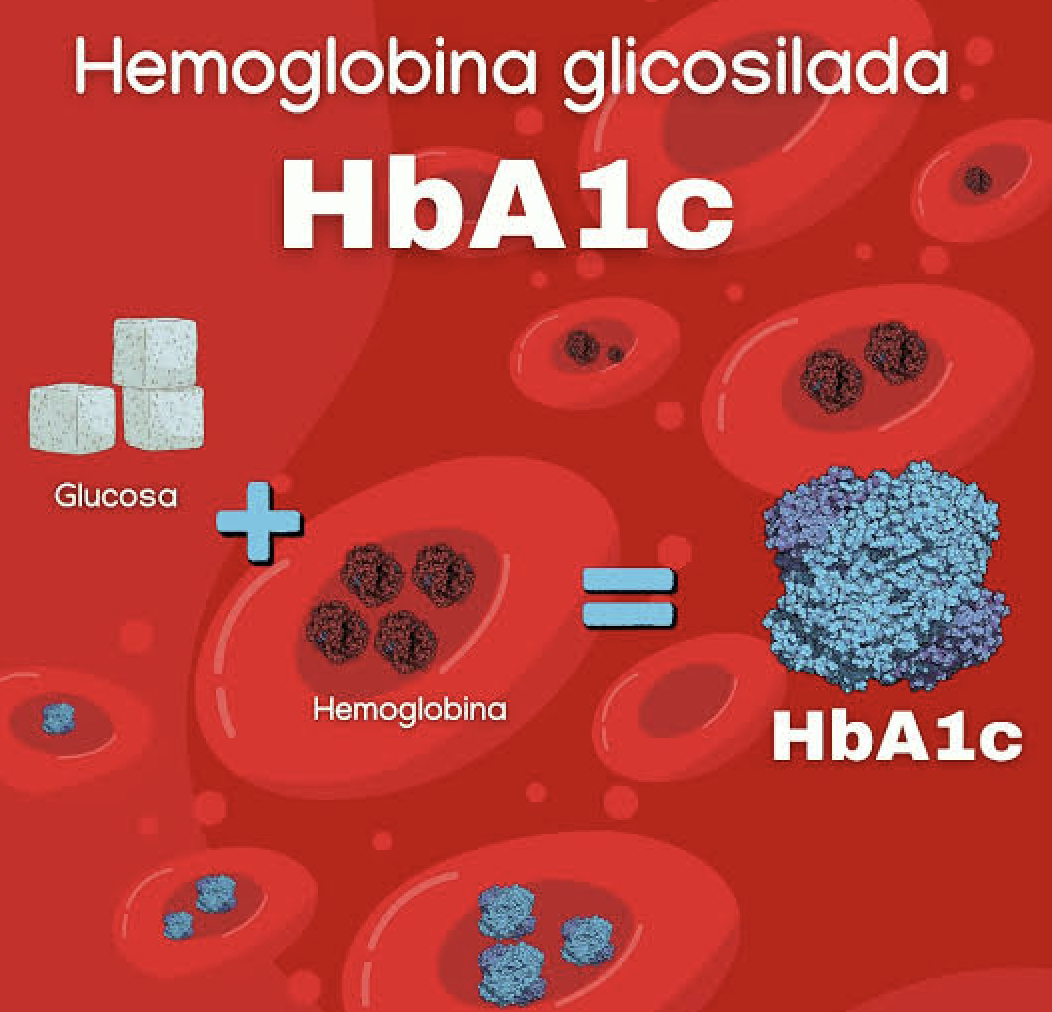

**Objetivo general:**

Desarrollar modelos de machine learning que predigan el riesgo de resultados adversos (p. ej., reingreso hospitalario) en pacientes con diabetes mellitus, utilizando como variable principal el resultado de la HbA1c, e identificar factores asociados para generar explicaciones interpretables y útiles para la práctica clínica.

**Preguntas de investigación**

¿Cómo la inclusión de HbA1c mejora la capacidad predictiva de los modelos de reingreso hospitalario en comparación con modelos que solo usan variables demográficas y clínicas?

**Actividades para el desarrollo del objetivo**

- Realizar un análisis descriptivo de las características demográficas, clínicas y de tratamiento de los pacientes diabéticos hospitalizados.
- Preprocesar los datos mediante limpieza, imputación y codificación adecuada para su uso en modelos predictivos.
- Entrenar y evaluar modelos supervisados (regresión logística) para predecir reingreso hospitalario, incorporando HbA1c y variables relevantes.
- Comparar desempeño de los modelos mediante métricas de discriminación y calibración.
= Identificar las variables más influyentes mediante interpretabilidad global (importancias, SHAP) y local, para guiar decisiones clínicas.

**Datos y población**

Se utilizará el dataset diabetes 130 US hospitals for years 1999–2008 (UCI Repository), que contiene 69 984 registros de hospitalizaciones únicas correspondientes a pacientes con diagnóstico de diabetes. Cada instancia representa un encuentro hospitalario (1–14 días) con medición de laboratorio y administración de medicamentos. El conjunto incluye 55 variables, que abarcan datos demográficos (edad, sexo, raza), tipo de admisión, diagnósticos ICD-9, HbA1c, pruebas de glucosa, uso de medicamentos antidiabéticos y cambios en la medicación, entre otros. La variable objetivo propuesta será reingreso hospitalario (categorías: <30 días, >30 días, no reingreso), mientras que HbA1c se analizará como predictor clave y posible punto de decisión clínica.

##**Dataset: Diabetes 130 US hospitals for years 1999–2008**

**Datos demográficos**

- race – Raza (Caucasian, AfricanAmerican, Asian, Hispanic, Other).
- gender – Género (Male, Female, Unknown/Invalid).
- age – Edad en intervalos de 10 años: [0-10), [10-20), ..., [90-100).
- weight – Peso en libras (97 % faltante).

**Información de admisión y egreso**

- Admission_type_id – Tipo de admisión (emergency, urgent, elective, etc.).
- Discharge_disposition_id – Disposición al alta (home, expired, hospice, etc.).
- Admission_source_id – Fuente de admisión (ER, physician referral, etc.).

**Estancia hospitalaria**

- time_in_hospital – Días de hospitalización (1–14).
- payer_code – Código del seguro (alto % de faltantes).
- medical_specialty – Especialidad del médico (internal medicine, cardiology, etc.).

**Diagnósticos**

- diag_1 – Diagnóstico primario (códigos ICD-9, solo 3 dígitos).
- diag_2 – Diagnóstico secundario.
- diag_3 – Diagnóstico adicional.
- number_diagnoses – Número total de diagnósticos.

**Pruebas de laboratorio**

- num_lab_procedures – Número de pruebas de laboratorio realizadas.
- num_procedures – Número de procedimientos (excluye lab).
- num_medications – Número de medicamentos diferentes administrados.

**Historial de visitas previas**

- number_outpatient – Visitas ambulatorias previas (último año).
- number_emergency – Visitas a urgencias previas (último año).
- number_inpatient – Hospitalizaciones previas (último año).

**Resultados de glucosa y HbA1c**

- max_glu_serum – Resultado de glucosa sérica: >200, >300, normal, none.
- A1Cresult – Resultado de HbA1c: >8, >7, normal, none.

**Información sobre medicación**

- change – Si hubo cambio en la medicación (yes/no).
- diabetesMed – Si se prescribió medicación antidiabética (yes/no).

**Medicamentos específicos (24 variables)**

Cada variable indica si el medicamento fue usado y si la dosis cambió:
- metformin
- repaglinide
- nateglinide
- chlorpropamide
- glimepiride
- acetohexamide
- glipizide
- glyburide
- tolbutamide
- pioglitazone
- rosiglitazone
- acarbose
- miglitol
- troglitazone
- tolazamide
- examide
- citagliptin
- insulin
- glyburide-metformin
- glipizide-metformin
- glimepiride-pioglitazone
- metformin-rosiglitazone
- metformin-pioglitazone

**Variable objetivo**

- readmitted – Estado de reingreso: <30 días, >30 días, No.


**Total**: 55 variables

(2 identificadores + 6 demográficas y administrativas + 3 diagnósticos + 4 hospitalización + 6 clínicas + 24 medicamentos + 1 objetivo).

**Análisis Exploratorio de Datos**

In [ ]:
# =========================================
# 1. Cargar librerías necesarias
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de gráficas
plt.style.use("ggplot")
sns.set_palette("pastel")

# =========================================
# 2. Cargar el dataset
# (asegúrate de subir el CSV de UCI a tu entorno de trabajo)
# =========================================
df = pd.read_csv("diabetic_data.csv")

# Vista rápida de los datos
print(df.shape)
df.head()


**Preparación de datos**

El preprocesamiento incluye manejo de valores faltantes (atributos como peso tienen hasta 97 % de faltantes y se excluirán), imputación de variables relevantes, codificación one-hot para categóricas (p. ej., diagnósticos, tipo de admisión), y normalización en predictores numéricos. Se manejará el desbalance de clases (la categoría “<30 días” es minoritaria) mediante técnicas como class weights o SMOTE en entrenamiento. Se realizará partición train/valid/test estratificada.

**Modelado y validación**

Se evaluarán modelos supervisados: Regresión Logística (con regularización), Árboles de Decisión, Random Forest, y XGBoost. El desempeño se medirá mediante ROC-AUC (métrica principal), F1-score, precisión, sensibilidad y análisis de calibración (curva y Brier score). Se aplicará validación cruzada estratificada y optimización de hiperparámetros con Grid Search o Random Search.

**Interpretabilidad**

Se generarán explicaciones globales (importancia de variables, coeficientes) y locales. Se espera que variables como HbA1c, tiempo en hospital, diagnóstico primario, número de medicamentos y especialidad médica tengan alta relevancia.

**Consideraciones éticas**

El dataset está anonimizado y cumple con estándares HIPAA, por lo que no implica riesgos para la privacidad. Sin embargo, los modelos generados no reemplazan el juicio clínico y se proponen únicamente como herramientas de apoyo.

**Referencias:**

- International Diabetes Federation. IDF Diabetes Atlas (11.ª ed., 2025): aproximadamente 589 millones de adultos con diabetes, 1 billón USD en gasto sanitario, 81 % en países de ingresos bajos y medios, alto porcentaje de casos no diagnosticados
Wikipedia
Diabetes Atlas

- International Diabetes Federation. IDF Diabetes Atlas (2024 datos, región SACA – Colombia): 8,4 % de prevalencia en adultos, 3 033 800 casos en una población adulta de 36 728 500
International Diabetes Federation

- Estudio en Bogotá (2022-2023): prevalencia de diabetes tipo 2 del 11 % y factores asociados (edad ≥ 55 años, obesidad abdominal, hipertrigliceridemia, nivel educativo bajo)
PubMed
.